# FDS CBP

---



***IMPORTING DATASET FROM KAGGLE***

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandu27","key":"ff0524d96f90c55f250643e755a56cdc"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Dec 13 04:39 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd #Print Working Directory


/content


In [ ]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                 DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1720        175  1.0              
derrekdevon/real-estate-sales-2001-2020                         Real Estate Sales 2001-2020                       28MB  2023-12-07 15:36:26           1070         28  1.0              
muhammadbinimran/housing-price-prediction-data                  Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           7587        137  1.0              
jocelyndumlao/cardiovascular-disease-dataset                    Cardiovascu

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 98% 326M/331M [00:05<00:00, 45.2MB/s]
100% 331M/331M [00:05<00:00, 65.2MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

---

IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
path = Path("/content/UTKFace")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

23708
['80_0_0_20170111205531200.jpg.chip.jpg', '40_0_4_20170117204008359.jpg.chip.jpg', '32_1_1_20170113011625824.jpg.chip.jpg']


---

DATA PRE PROCESSING

In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [ ]:
image_path

['50_1_0_20170117092638126.jpg.chip.jpg',
 '38_1_2_20170109140654630.jpg.chip.jpg',
 '60_1_0_20170110140900329.jpg.chip.jpg',
 '19_0_1_20170114025936564.jpg.chip.jpg',
 '26_1_0_20170113001701275.jpg.chip.jpg',
 '37_0_1_20170116194434755.jpg.chip.jpg',
 '30_1_1_20170112234651369.jpg.chip.jpg',
 '72_1_0_20170110175634167.jpg.chip.jpg',
 '32_1_1_20170116160935586.jpg.chip.jpg',
 '22_1_2_20170116162023656.jpg.chip.jpg',
 '50_0_0_20170117190140770.jpg.chip.jpg',
 '31_0_2_20170116170837254.jpg.chip.jpg',
 '23_0_2_20170108224712804.jpg.chip.jpg',
 '23_1_1_20170117175615774.jpg.chip.jpg',
 '40_0_0_20170104205218667.jpg.chip.jpg',
 '45_0_0_20170117165202100.jpg.chip.jpg',
 '6_0_2_20170103210440650.jpg.chip.jpg',
 '34_0_1_20170117204703255.jpg.chip.jpg',
 '9_0_0_20170110224611885.jpg.chip.jpg',
 '35_1_0_20170117190350409.jpg.chip.jpg',
 '3_1_0_20161219205155700.jpg.chip.jpg',
 '26_1_0_20170117201947511.jpg.chip.jpg',
 '45_0_0_20170105184113903.jpg.chip.jpg',
 '28_0_4_20170116220531686.jpg.chip.j

---

CREATING DATA FRAME

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,50_1_0_20170117092638126.jpg.chip.jpg,50,1
1,38_1_2_20170109140654630.jpg.chip.jpg,38,1
2,60_1_0_20170110140900329.jpg.chip.jpg,60,1
3,19_0_1_20170114025936564.jpg.chip.jpg,19,0
4,26_1_0_20170113001701275.jpg.chip.jpg,26,1


In [ ]:
gender_dict = {0:"Male",1:"Female"}

In [ ]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [ ]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


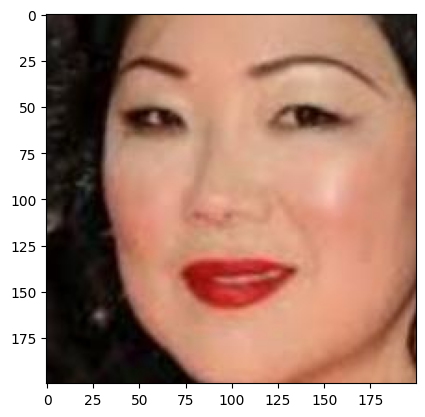

In [ ]:
img = Image.open("UTKFace/"+df.image[1])
plt.imshow(img)

<ipython-input-71-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

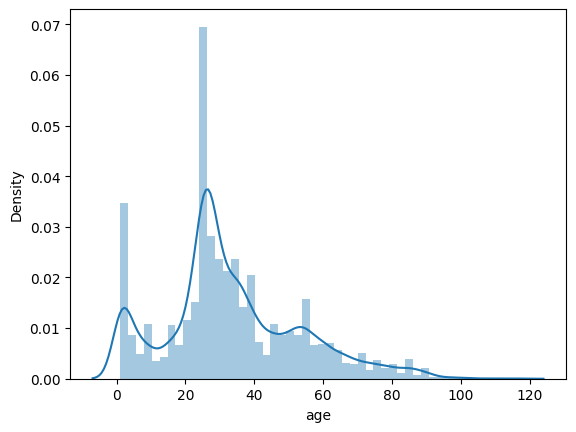

In [ ]:
sns.distplot(df.age)

---

PLOTTING IMAGES

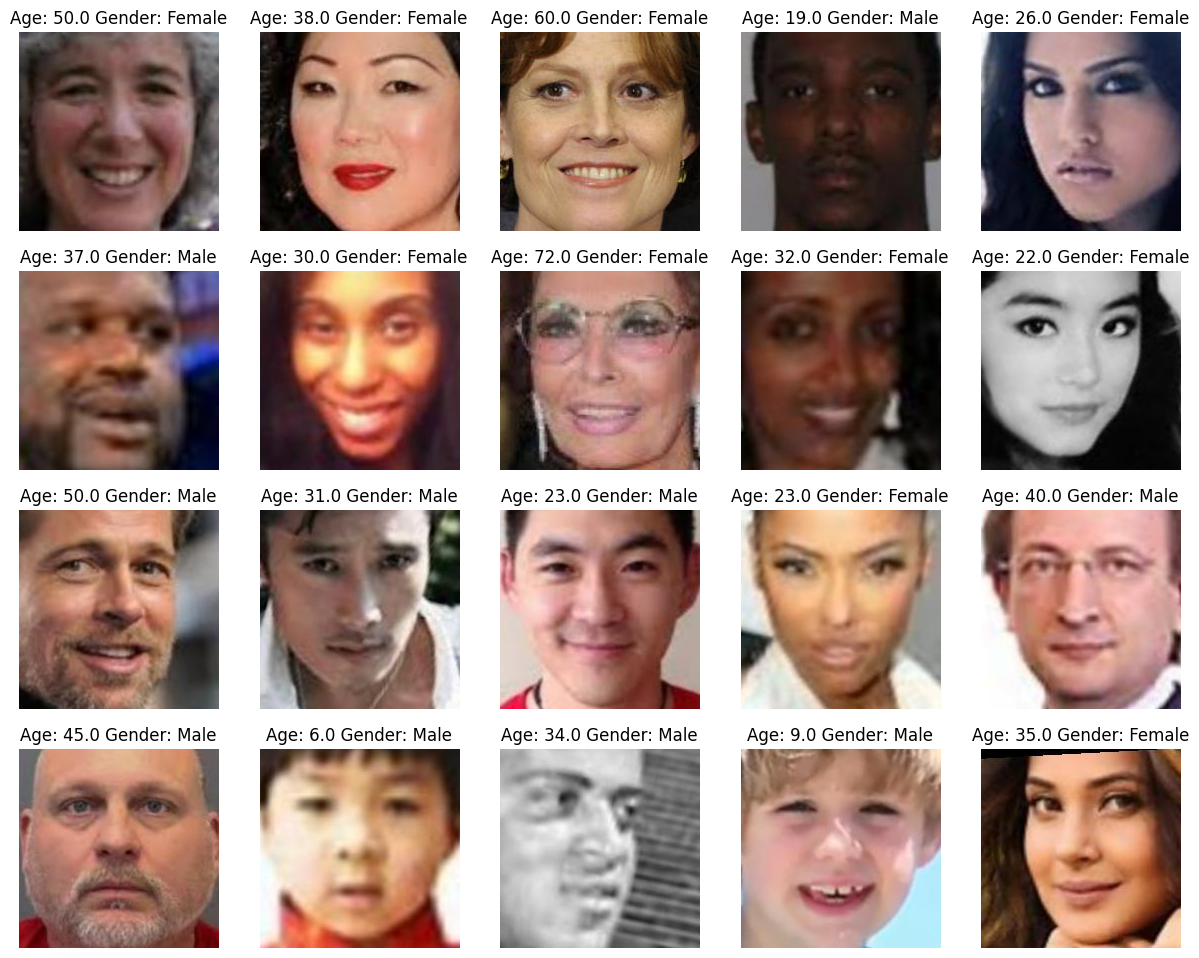

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

TRAIN AND TEST DATASET

In [ ]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [ ]:
train.head()

,image,age,gender
18199,19_1_2_20170116212110227.jpg.chip.jpg,19.0,1
19557,28_0_0_20170105162351171.jpg.chip.jpg,28.0,0
20132,27_0_1_20170116194835214.jpg.chip.jpg,27.0,0
11849,1_0_3_20161220142921293.jpg.chip.jpg,1.0,0
2100,54_0_3_20170119181142982.jpg.chip.jpg,54.0,0


---

EXTRACTNG FEATURES

In [ ]:
x_train = []
for file in train.image:
    img = load_img("UTKFace/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
<ipython-input-37-e8691984f203>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
x_train.shape

(3556, 128, 128, 1)

---

NORMALIZING DATA

In [ ]:
x_train = x_train/255

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

---

CREATING MODEL

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

---

TRAINING THE MODEL

In [ ]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
320/320 [==============================] - 256s 781ms/step - loss: 16.3881 - gender_output_loss: 0.6901 - age_output_loss: 15.6981 - gender_output_accuracy: 0.6672 - age_output_accuracy: 0.0475 - val_loss: 29.3879 - val_gender_output_loss: 0.6365 - val_age_output_loss: 28.7514 - val_gender_output_accuracy: 0.7219 - val_age_output_accuracy: 0.0281
Epoch 2/20
320/320 [==============================] - 248s 775ms/step - loss: 13.1999 - gender_output_loss: 0.4914 - age_output_loss: 12.7085 - gender_output_accuracy: 0.7741 - age_output_accuracy: 0.0453 - val_loss: 11.1464 - val_gender_output_loss: 0.5188 - val_age_output_loss: 10.6276 - val_gender_output_accuracy: 0.7416 - val_age_output_accuracy: 0.0393
Epoch 3/20
320/320 [==============================] - 252s 787ms/step - loss: 11.3362 - gender_output_loss: 0.4378 - age_output_loss: 10.8983 - gender_output_accuracy: 0.7944 - age_output_accuracy: 0.0472 - val_loss: 10.0856 - val_gender_output_loss: 0.4093 - val_age_output_loss:



---


VISUALIZING THE LOSS

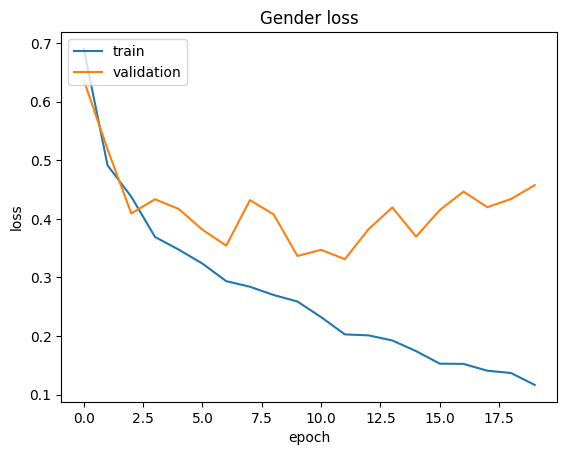

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

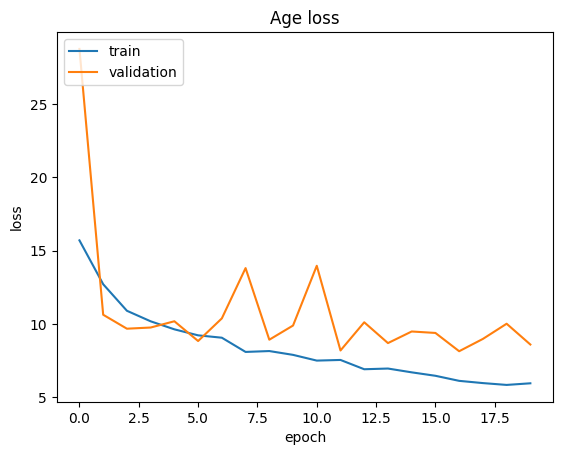

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---

PREDICTING TEST IMAGE

Original: Gender =  Female  Age =  26.0
1/1 [==============================] - 0s 58ms/step
Prediction: Gender =  Female  Age =  22


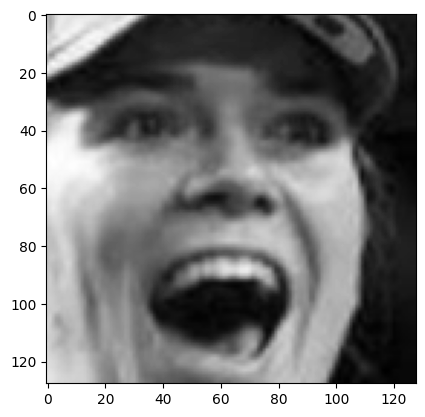

In [ ]:
index=67
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Male  Age =  16.0
1/1 [==============================] - 0s 110ms/step
Prediction: Gender =  Male  Age =  16


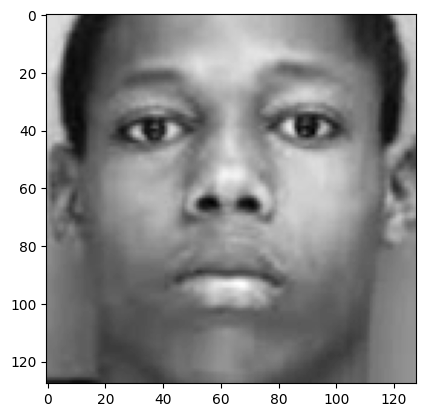

In [ ]:
index=55
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')